In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [5]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [6]:
df = pd.read_csv('D:/Datasets/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
dat1, sampling_rate1 = librosa.load('D:/Datasets/UrbanSound8K/UrbanSound8K/audio/fold5/100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('D:/Datasets/UrbanSound8K/UrbanSound8K/audio/fold5/100263-2-0-121.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

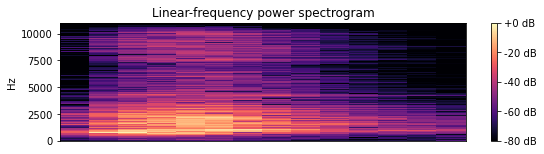

In [8]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

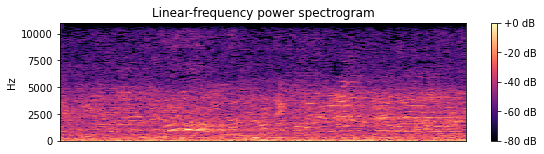

In [9]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

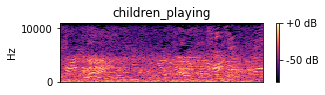

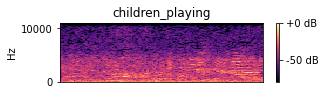

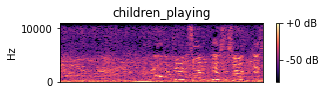

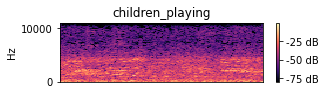

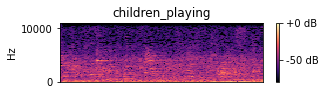

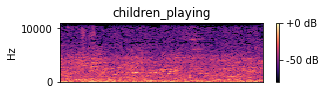

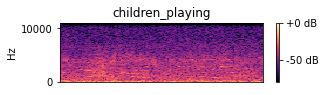

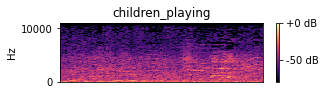

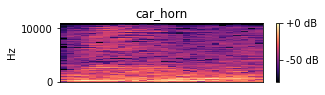

In [10]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])
for i in range(1, 10):
    path = 'D:/Datasets/UrbanSound8K/UrbanSound8K/audio/fold' + str(fold[i]) + '/' + arr[i]
    data,sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [11]:
dat1, sampling_rate1 = librosa.load('D:/Datasets/UrbanSound8K/UrbanSound8K/audio/fold5/100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y=dat1)
arr

array([[5.2041847e-05, 7.4304415e-05, 7.9062178e-05, ..., 7.2118869e-06,
        9.1289648e-06, 2.2435783e-05],
       [1.1983800e-04, 1.0407303e-04, 1.2973434e-04, ..., 1.5024093e-05,
        3.2160071e-05, 5.9852322e-05],
       [2.1444363e-04, 1.9571814e-04, 1.6796264e-04, ..., 1.9602911e-04,
        2.1960895e-04, 3.1910744e-04],
       ...,
       [2.2120930e-05, 7.1933417e-04, 9.0416092e-03, ..., 7.6777469e-06,
        2.8534155e-06, 1.6350416e-06],
       [1.2387790e-05, 3.7830550e-04, 2.3212265e-03, ..., 1.9659210e-06,
        8.1735595e-07, 3.0941581e-07],
       [2.0148848e-06, 2.1154365e-05, 1.2156230e-04, ..., 1.5913621e-07,
        6.1772454e-08, 4.1444746e-08]], dtype=float32)

In [12]:
from tqdm import tqdm
slice_file_name = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
features = []
labels = []
def feature_extraction(row):
    for i in tqdm(range(len(row))):
        filename = 'D:/Datasets/UrbanSound8K/UrbanSound8K/audio/fold' + str(fold[i]) + '/' + slice_file_name[i]
        X,sample_rate = librosa.load(filename)
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr = sample_rate).T, axis = 0)
        features.append(mels)
        labels.append(df['classID'][i])
    return [features, labels]

In [13]:
temp = feature_extraction(df)

 41%|████      | 3555/8732 [09:12<12:55,  6.68it/s]  C:\Users\punee\.conda\envs\tensorflow-gpu\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
 95%|█████████▌| 8326/8732 [20:58<00:39, 10.39it/s]C:\Users\punee\.conda\envs\tensorflow-gpu\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\punee\.conda\envs\tensorflow-gpu\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
100%|██████████| 8732/8732 [21:55<00:00,  6.64it/s]


In [14]:
len(temp)

2

In [15]:
temp = np.array(temp)
data = temp.transpose()
data

array([[array([2.69715492e-05, 2.21944458e-04, 2.99823791e-04, 5.58928994e-04,
       4.97487956e-04, 1.09181064e-03, 5.21051278e-03, 3.60693014e-03,
       3.06366081e-03, 1.18800357e-03, 7.44290825e-04, 1.55307655e-03,
       1.68589863e-03, 1.78817345e-03, 3.08348611e-03, 9.20694508e-03,
       6.60946220e-03, 4.82696900e-03, 1.55482423e-02, 4.24068943e-02,
       1.09501623e-01, 3.42507929e-01, 2.82818884e-01, 3.74692827e-01,
       1.72823679e+00, 6.56258917e+00, 2.73338866e+00, 4.23909807e+00,
       5.81868076e+00, 1.18878860e+01, 3.55284004e+01, 4.24216118e+01,
       5.75797234e+01, 1.75557156e+01, 1.13941593e+01, 1.45484457e+01,
       8.21766090e+00, 5.47200108e+00, 1.78720684e+01, 3.90714912e+01,
       1.45371771e+01, 1.98439770e+01, 1.02135868e+01, 5.77715588e+00,
       1.82425952e+00, 1.47288799e+00, 1.66696620e+00, 1.40258515e+00,
       2.94611502e+00, 7.24897242e+00, 3.97144938e+00, 1.76551545e+00,
       1.71376419e+00, 3.65799499e+00, 2.84874320e+00, 1.72395229e+01

In [16]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [17]:
for i in range(8732):
    X[i] = (X_[i])

In [18]:
Y = to_categorical(Y)

In [19]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [53]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)
X_train

array([[[[5.52051133e-02],
         [6.23029484e-02],
         [3.91786089e-02],
         ...,
         [2.58125698e-03],
         [1.05082708e-03],
         [7.12146338e-03]],

        [[1.23652094e-02],
         [6.07137727e-03],
         [9.58221940e-03],
         ...,
         [1.99351965e-03],
         [2.68442070e-03],
         [1.58415764e-03]],

        [[4.38767695e-03],
         [2.19055017e-03],
         [5.95834021e-03],
         ...,
         [8.38560404e-03],
         [1.66879691e-02],
         [5.71094167e-03]],

        ...,

        [[6.54174124e-05],
         [3.12644806e-05],
         [3.29522270e-05],
         ...,
         [2.17585258e-05],
         [2.38273786e-05],
         [2.59564313e-05]],

        [[2.73407711e-05],
         [3.04587660e-05],
         [1.88735661e-05],
         ...,
         [1.82104571e-05],
         [1.65449273e-05],
         [1.08549892e-05]],

        [[9.31984361e-06],
         [6.54530355e-06],
         [5.29451497e-06],
         ...,
 

In [54]:
input_dim = (16, 8, 1)

In [55]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epochs, logs={}):
            if(logs.get('accuracy') > 0.998):
                print("\nReached 99.8% accuracy so cancelling training!")
                self.model.stop_training = True

In [58]:
model = Sequential()
callbacks = myCallback()

In [59]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2048, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [60]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [61]:
model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_data = (X_test, Y_test), callbacks = [callbacks])

Epoch 1/100
131/131 [==============================] - 4s 27ms/step - loss: 2.0336 - accuracy: 0.2634 - val_loss: 1.9631 - val_accuracy: 0.3170
Epoch 2/100
131/131 [==============================] - 3s 26ms/step - loss: 1.8308 - accuracy: 0.3657 - val_loss: 1.7824 - val_accuracy: 0.3967
Epoch 3/100
131/131 [==============================] - 4s 28ms/step - loss: 1.7021 - accuracy: 0.4062 - val_loss: 1.6710 - val_accuracy: 0.4159
Epoch 4/100
131/131 [==============================] - 3s 25ms/step - loss: 1.5898 - accuracy: 0.4405 - val_loss: 1.5996 - val_accuracy: 0.4366
Epoch 5/100
131/131 [==============================] - 4s 28ms/step - loss: 1.5364 - accuracy: 0.4590 - val_loss: 1.5926 - val_accuracy: 0.4608
Epoch 6/100
131/131 [==============================] - 3s 27ms/step - loss: 1.4727 - accuracy: 0.4883 - val_loss: 1.5334 - val_accuracy: 0.4650
Epoch 7/100
131/131 [==============================] - 4s 34ms/step - loss: 1.4117 - accuracy: 0.5069 - val_loss: 1.4311 - val_accuracy:

131/131 [==============================] - 4s 31ms/step - loss: 0.6521 - accuracy: 0.7784 - val_loss: 1.1863 - val_accuracy: 0.7178
Epoch 58/100
131/131 [==============================] - 4s 31ms/step - loss: 0.6288 - accuracy: 0.7907 - val_loss: 1.2045 - val_accuracy: 0.7229
Epoch 59/100
131/131 [==============================] - 4s 32ms/step - loss: 0.6029 - accuracy: 0.7968 - val_loss: 1.1669 - val_accuracy: 0.7178
Epoch 60/100
131/131 [==============================] - 6s 49ms/step - loss: 0.6051 - accuracy: 0.7998 - val_loss: 1.2254 - val_accuracy: 0.7091
Epoch 61/100
131/131 [==============================] - 5s 36ms/step - loss: 0.6363 - accuracy: 0.7888 - val_loss: 1.1700 - val_accuracy: 0.7471
Epoch 62/100
131/131 [==============================] - 4s 31ms/step - loss: 0.5951 - accuracy: 0.8032 - val_loss: 1.1023 - val_accuracy: 0.7508
Epoch 63/100
131/131 [==============================] - 3s 26ms/step - loss: 0.5865 - accuracy: 0.8078 - val_loss: 1.1841 - val_accuracy: 0.728

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 2, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2048)             

In [ ]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

In [ ]:
preds = np.argmax(predictions, axis = 1)

In [ ]:
result = pd.DataFrame(preds)
result.to_csv("UrbanSound8kResults.csv")